#Importing Library Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.cm import get_cmap
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Loading Dataset1

In [ ]:
file_path = '/content/t2020_rd310.tsv'

data_2000_2021 = pd.read_csv(file_path, sep='\t')

data_2000_2021.head()

,"unit,geo\time",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"EUR_KGOE,AL",2.831,3.003,2.842,3.063,2.945,3.091,3.376,3.797,3.922,...,4.625,3.961,4.048,4.431,4.405,4.371,4.573,4.692,4.879,:
1,"EUR_KGOE,AT",8.688,8.340,8.429,8.083,8.194,8.060,8.264,8.721,8.779,...,9.088,8.984,9.374,9.244,9.298,9.340,9.790,9.724,9.780,9.689
2,"EUR_KGOE,BA",:,:,:,:,:,:,:,:,:,...,:,:,2.240,2.268,2.140,2.213,2.075,2.209,2.179,2.256
3,"EUR_KGOE,BE",4.730,4.829,4.953,4.767,4.894,5.042,5.173,5.366,5.220,...,6.159,5.966,6.434,6.510,6.212,6.236,6.341,6.454,6.791,6.474
4,"EUR_KGOE,BG",1.308,1.299,1.408,1.443,1.579,1.598,1.657,1.802,1.935,...,2.134,2.280,2.202,2.179,2.294,2.277,2.330,2.445,2.479,2.468


# Loading Dataset2

In [ ]:
file_path = '/content/ten00117.tsv'

data_2011_2022 = pd.read_csv(file_path, sep='\t')

data_2011_2022.head()

,"product,currency,unit,indic_en,geo\time",2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"6000,EUR,KWH,MSHH,AL",0.1152,0.1163,0.1156,0.1156,0.0812,0.0824,0.0844,:,0.0920 e,0.0922 e,0.0925 e,0.0941
1,"6000,EUR,KWH,MSHH,AT",0.1986,0.1975,0.2082,0.2021,0.2009,0.2034,0.195,0.1966,0.2034,0.2111,0.2216,0.2249
2,"6000,EUR,KWH,MSHH,BA",0.0745,0.0798,0.0803,0.0791,0.0812,0.0831,0.0859,0.0864,0.0873,0.0870,0.0875,0.0887
3,"6000,EUR,KWH,MSHH,BE",0.2136,0.2327,0.2173,0.2097,0.2126,0.2544,0.2857,0.2824,0.2839,0.2792,0.2702,0.3437
4,"6000,EUR,KWH,MSHH,BG",0.0826,0.0846,0.0924,0.0832,0.0942,0.0956,0.0955,0.0979,0.0997,0.0997,0.1024,0.1093


# Display basic information about the dataset1

In [ ]:
data_2000_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unit,geo\time  75 non-null     object 
 1   2000           75 non-null     object 
 2   2001           75 non-null     object 
 3   2002           75 non-null     object 
 4   2003           75 non-null     object 
 5   2004           75 non-null     object 
 6   2005           75 non-null     object 
 7   2006           75 non-null     object 
 8   2007           75 non-null     object 
 9   2008           75 non-null     object 
 10  2009           75 non-null     object 
 11  2010           75 non-null     object 
 12  2011           75 non-null     object 
 13  2012           75 non-null     object 
 14  2013           75 non-null     object 
 15  2014           75 non-null     float64
 16  2015           75 non-null     float64
 17  2016           75 non-null     float64
 18  2017        

# Display basic information about the dataset2

In [ ]:
data_2011_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   product,currency,unit,indic_en,geo\time  84 non-null     object
 1   2011                                     84 non-null     object
 2   2012                                     84 non-null     object
 3   2013                                     84 non-null     object
 4   2014                                     84 non-null     object
 5   2015                                     84 non-null     object
 6   2016                                     84 non-null     object
 7   2017                                     84 non-null     object
 8   2018                                     84 non-null     object
 9   2019                                     84 non-null     object
 10  2020                                     84 non-null     object


# Summary statistics of dataset1

In [ ]:
data_2000_2021.describe()

,2014,2015,2016,2017,2018,2019
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,6.929747,7.168387,7.169240,7.280440,7.546813,7.854987
std,2.807367,3.081004,3.067642,3.238788,3.380710,3.495023
min,1.772000,1.991000,1.963000,2.166000,2.060000,2.192000
25%,4.718500,4.951500,4.803000,4.815500,5.073000,5.300000
50%,7.153000,7.169000,7.234000,7.343000,7.606000,8.238000
75%,8.586000,8.711000,8.895000,9.111000,9.375000,9.687000
max,14.012000,16.210000,15.589000,17.395000,18.539000,19.396000


# Summary statistics of dataset2

In [ ]:
data_2011_2022.describe()

,"product,currency,unit,indic_en,geo\time",2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,84,84,84,84,84,84,84,84,84,84,84,84,84
unique,84,64,66,71,76,73,79,80,78,84,82,82,79
top,"6000,EUR,KWH,MSHH,AL",:,:,:,:,:,:,:,:,0.0920 e,0.0795,:,:
freq,1,17,16,10,8,6,4,4,2,1,2,2,6


# Checking for missing values of dataset1

In [ ]:
missing_values = data_2000_2021.isnull().sum()
print(missing_values)

unit,geo\time    0
2000             0
2001             0
2002             0
2003             0
2004             0
2005             0
2006             0
2007             0
2008             0
2009             0
2010             0
2011             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020             0
2021             0
dtype: int64


# Checking for missing values of dataset2

In [ ]:
missing_values = data_2011_2022.isnull().sum()
print(missing_values)

product,currency,unit,indic_en,geo\time    0
2011                                       0
2012                                       0
2013                                       0
2014                                       0
2015                                       0
2016                                       0
2017                                       0
2018                                       0
2019                                       0
2020                                       0
2021                                       0
2022                                       0
dtype: int64


#Top 10 Primary Energy Production by Fuel Type

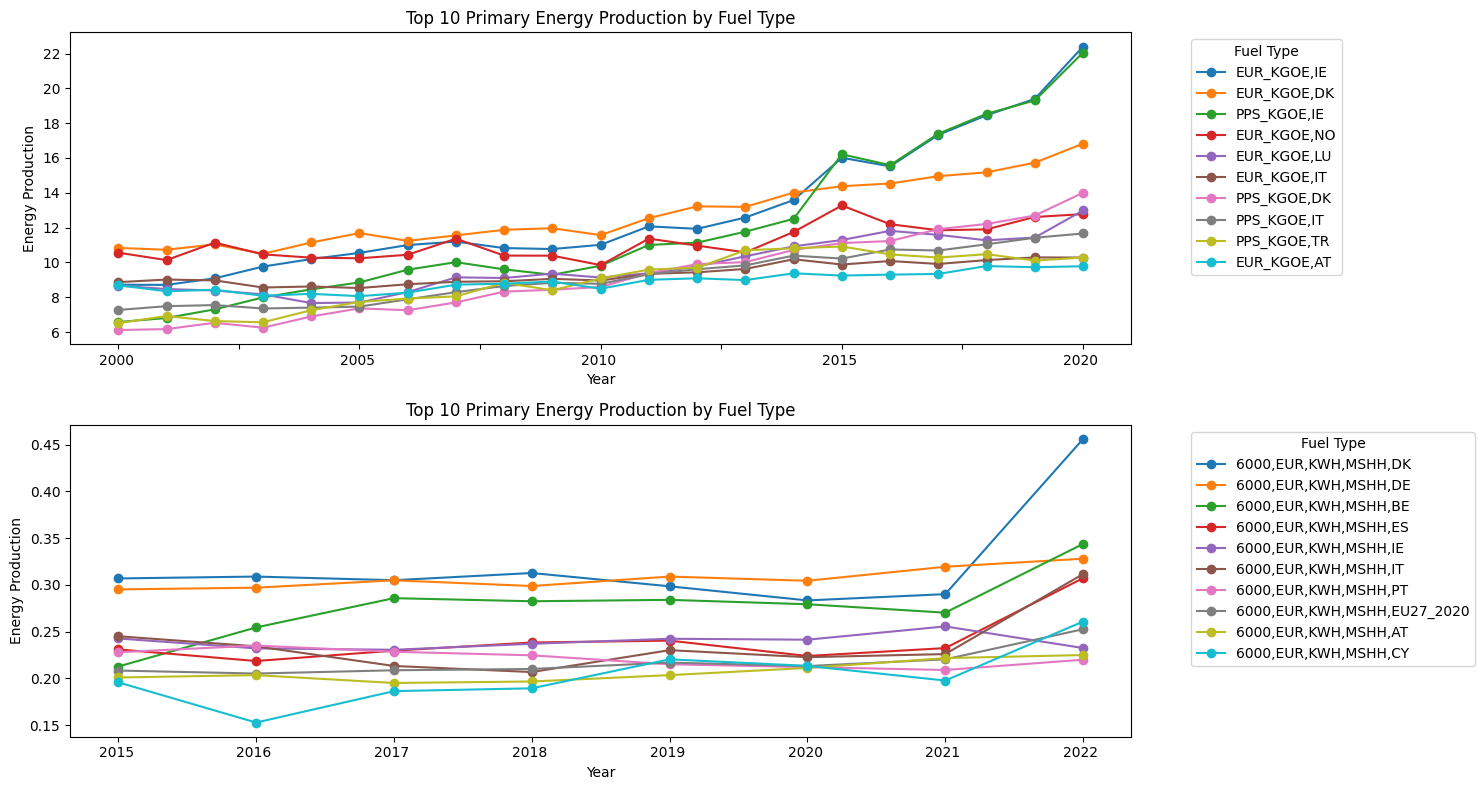

In [ ]:
years1 = data_2000_2021.columns[1:-1]
years2 = data_2011_2022.columns[5:]

data_2000_2021[years1] = data_2000_2021[years1].replace(':', pd.NA)
data_2011_2022[years2] = data_2011_2022[years2].replace(':', pd.NA)

data_2000_2021[years1] = data_2000_2021[years1].apply(pd.to_numeric, errors='coerce')
data_2011_2022[years2] = data_2011_2022[years2].apply(pd.to_numeric, errors='coerce')

fuel_columns1 = ['unit,geo\\time'] + list(years1)
fuel_data1 = data_2000_2021[fuel_columns1]
fuel_data1.set_index('unit,geo\\time', inplace=True)
fuel_data_transposed1 = fuel_data1.T
fuel_columns2 = ['product,currency,unit,indic_en,geo\\time'] + list(years2)
fuel_data2 = data_2011_2022[fuel_columns2]
fuel_data2.set_index('product,currency,unit,indic_en,geo\\time', inplace=True)
fuel_data_transposed2 = fuel_data2.T

top_fuel_types1 = fuel_data_transposed1.sum().sort_values(ascending=False).head(10).index
top_fuel_types2 = fuel_data_transposed2.sum().sort_values(ascending=False).head(10).index

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
fuel_data_transposed1[top_fuel_types1].plot(ax=plt.gca(), marker='o', linestyle='-', title='Top 10 Primary Energy Production by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Energy Production')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2, 1, 2)
fuel_data_transposed2[top_fuel_types2].plot(ax=plt.gca(), marker='o', linestyle='-', title='Top 10 Primary Energy Production by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Energy Production')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#Natural gas and crude oil

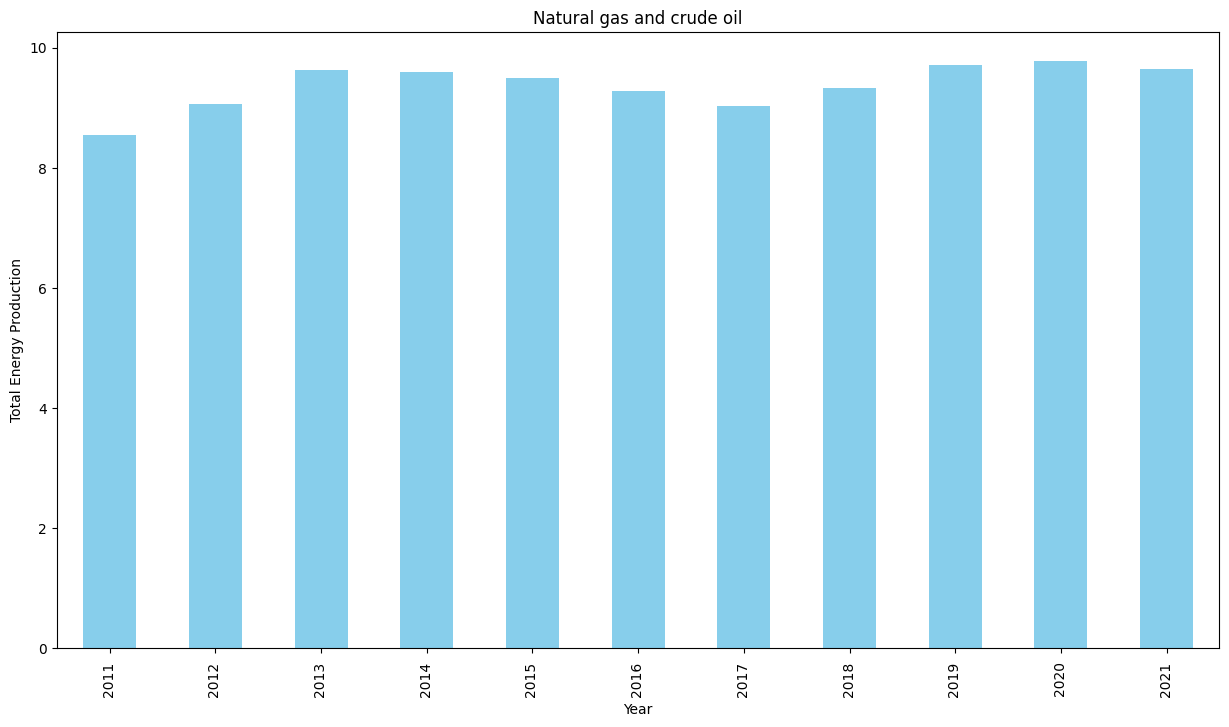

In [ ]:
fuel_columns = ['unit,geo\\time'] + list(data_2000_2021.columns[1:-1])
fuel_data = data_2000_2021[fuel_columns]
fuel_data.set_index('unit,geo\\time', inplace=True)
fuel_data = fuel_data.apply(pd.to_numeric, errors='coerce')
fuel_data_transposed = fuel_data.T

fuel_columns = ['product,currency,unit,indic_en,geo\\time'] + list(data_2011_2022.columns[1:-1])
fuel_data = data_2011_2022[fuel_columns]
fuel_data.set_index('product,currency,unit,indic_en,geo\\time', inplace=True)
fuel_data = fuel_data.apply(pd.to_numeric, errors='coerce')
fuel_data_transposed = fuel_data.T

total_energy_production = fuel_data_transposed.sum(axis=1)

plt.figure(figsize=(15, 8))
total_energy_production.plot(kind='bar', color='skyblue')
plt.title('Natural gas and crude oil')
plt.xlabel('Year')
plt.ylabel('Total Energy Production')
plt.show()

#Gross available energy in COVID-19 Pandemic

In [ ]:
data_2000_2021.columns = data_2000_2021.columns.str.strip()

cols_dataset1 = ['unit,geo\\time', '2019', '2020', '2021']
eu_data = data_2000_2021[cols_dataset1]

eu_data[['2019', '2020', '2021']] = eu_data[['2019', '2020', '2021']].apply(pd.to_numeric, errors='coerce')

top5_2019 = eu_data.sort_values(by='2019', ascending=False).head(5)
top5_2020 = eu_data.sort_values(by='2020', ascending=False).head(5)
top5_2021 = eu_data.sort_values(by='2021', ascending=False).head(5)

fig = px.line(top5_2019, x='unit,geo\\time', y='2019', labels={'2019': 'Gross Available Energy (EUR_KGOE)'}, title='Gross available energy in COVID-19 Pandemic - 2019')
fig.add_trace(px.line(top5_2020, x='unit,geo\\time', y='2020', labels={'2020': 'Gross Available Energy (EUR_KGOE)'}, title='Gross available energy in COVID-19 - 2020').data[0])
fig.add_trace(px.line(top5_2021, x='unit,geo\\time', y='2021', labels={'2021': 'Gross Available Energy (EUR_KGOE)'}, title='Gross available energy in COVID-19 - 2021').data[0])
fig.update_layout(hovermode="x unified")
fig.show()

<ipython-input-12-6b82a7305e81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data[['2019', '2020', '2021']] = eu_data[['2019', '2020', '2021']].apply(pd.to_numeric, errors='coerce')


#Top 5 Energy Dependency in EU Member States During COVID-19

<ipython-input-13-88a2a24032fc>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-88a2a24032fc>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-88a2a24032fc>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-13-88a2a24032fc>:18: MatplotlibDeprecationWarning:

Unable to determine Axes to 

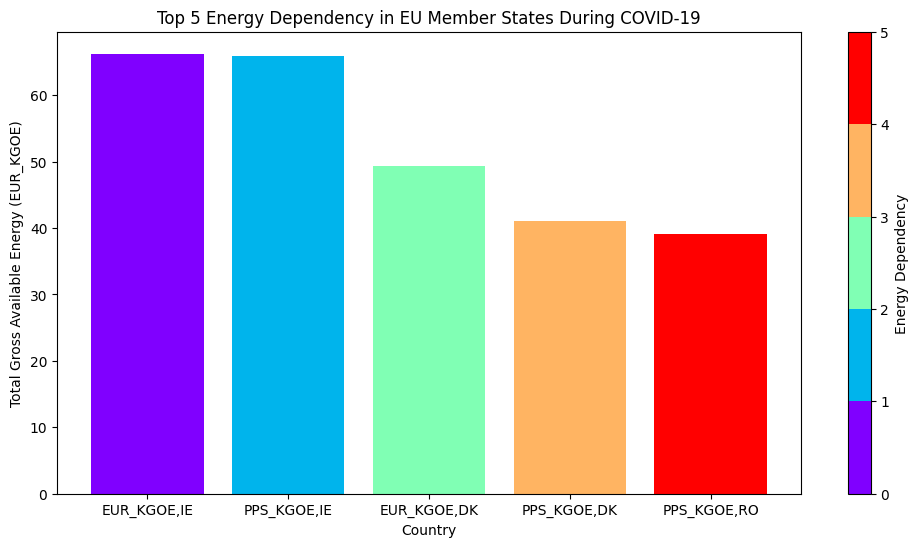

In [ ]:
data_2000_2021.columns = data_2000_2021.columns.str.strip()
data_2000_2021.replace(':', float('nan'), inplace=True)

fuel_mix_cols = ['unit,geo\\time', '2019', '2020', '2021']
fuel_mix_data = data_2000_2021[fuel_mix_cols]
fuel_mix_data[['2019', '2020', '2021']] = fuel_mix_data[['2019', '2020', '2021']].apply(pd.to_numeric, errors='coerce')
fuel_mix_data['Total'] = fuel_mix_data[['2019', '2020', '2021']].sum(axis=1)

top5_data = fuel_mix_data.nlargest(5, 'Total')

cmap = get_cmap('rainbow', len(top5_data))

plt.figure(figsize=(12, 6))
bars = plt.bar(top5_data['unit,geo\\time'], top5_data['Total'], color=cmap(range(len(top5_data))))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(top5_data)))
sm.set_array([])
plt.colorbar(sm, orientation='vertical', label='Energy Dependency')

plt.title('Top 5 Energy Dependency in EU Member States During COVID-19')
plt.xlabel('Country')
plt.ylabel('Total Gross Available Energy (EUR_KGOE)')
plt.show()

#Top 10 Energy Consumption in EU Member States (2021)

<ipython-input-14-8ec748f49971>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-8ec748f49971>:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-14-8ec748f49971>:17: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



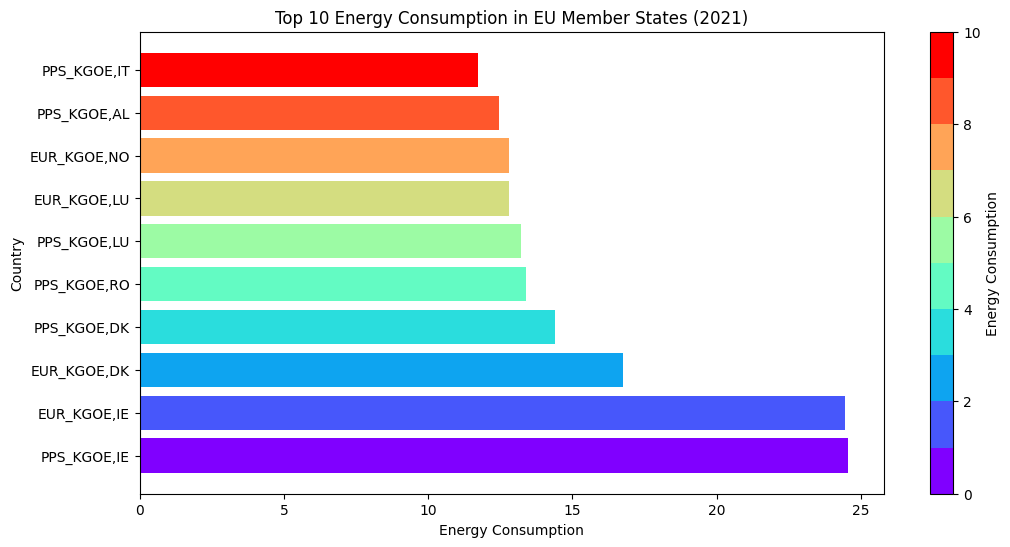

In [ ]:
cols = ['unit,geo\\time', '2021']

energy_data = data_2000_2021[cols]
energy_data['2021'] = pd.to_numeric(energy_data['2021'], errors='coerce')

top10_energy_data = energy_data.sort_values(by='2021', ascending=False).head(10)

cmap = get_cmap('rainbow', len(top10_energy_data))

plt.figure(figsize=(12, 6))

bars = plt.barh(top10_energy_data['unit,geo\\time'], top10_energy_data['2021'], color=cmap(range(len(top10_energy_data))))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(top10_energy_data)))
sm.set_array([])

plt.colorbar(sm, orientation='vertical', label='Energy Consumption')
plt.title('Top 10 Energy Consumption in EU Member States (2021)')
plt.xlabel('Energy Consumption')
plt.ylabel('Country')
plt.show()

#Time Series Data and ARIMA Model(2000-2021)

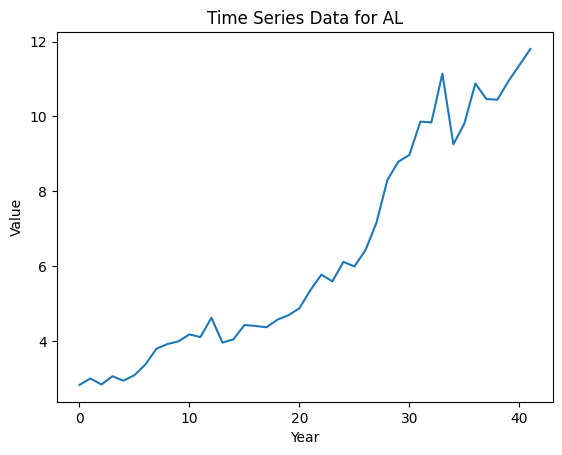

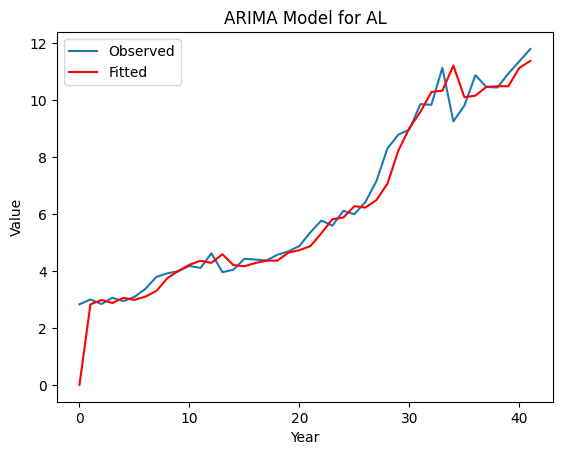

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   42
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -29.554
Date:                Thu, 07 Dec 2023   AIC                             71.107
Time:                        18:32:42   BIC                             81.389
Sample:                             0   HQIC                            74.851
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2632      0.162     -1.623      0.105      -0.581       0.055
ar.L2          0.0379      0.197      0.192      0.847      -0.348       0.424
ar.L3          0.2885      0.281      1.027      0.3

In [ ]:
country_code = 'AL'

time_series_data = data_2000_2021[data_2000_2021['unit,geo\\time'].str.endswith(country_code)].iloc[:, 1:-1].values.flatten()
time_series_data = pd.to_numeric(time_series_data, errors='coerce')

plt.plot(time_series_data)
plt.title(f'Time Series Data for {country_code}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

model = ARIMA(time_series_data, order=(5, 1, 0))
result = model.fit()

plt.plot(time_series_data, label='Observed')
plt.plot(result.fittedvalues, color='red', label='Fitted')
plt.title(f'ARIMA Model for {country_code}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

print(result.summary())

#Time Series Data and ARIMA Model(2011-2022)

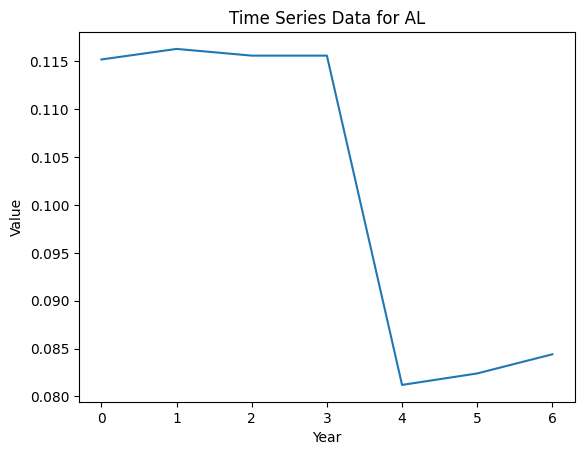

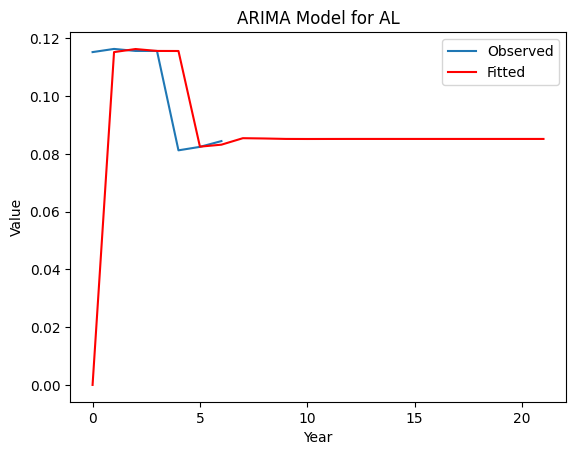

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  17.072
Date:                Thu, 07 Dec 2023   AIC                            -22.145
Time:                        18:32:43   BIC                            -15.878
Sample:                             0   HQIC                           -20.785
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0363     43.790     -0.001      0.999     -85.863      85.790
ar.L2         -0.0231     13.747     -0.002      0.999     -26.967      26.920
ar.L3         -0.0321     28.747     -0.001      0.9

In [ ]:
country_code = 'AL'

time_series_data = data_2011_2022[data_2011_2022['product,currency,unit,indic_en,geo\\time'].str.endswith(country_code)].iloc[:, 1:-1].values.flatten()
time_series_data = pd.to_numeric(time_series_data, errors='coerce')

plt.plot(time_series_data)
plt.title(f'Time Series Data for {country_code}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

model = ARIMA(time_series_data, order=(5, 1, 0))
result = model.fit()

plt.plot(time_series_data, label='Observed')
plt.plot(result.fittedvalues, color='red', label='Fitted')
plt.title(f'ARIMA Model for {country_code}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

print(result.summary())

#Comporison between Time Series Data and ARIMA Model

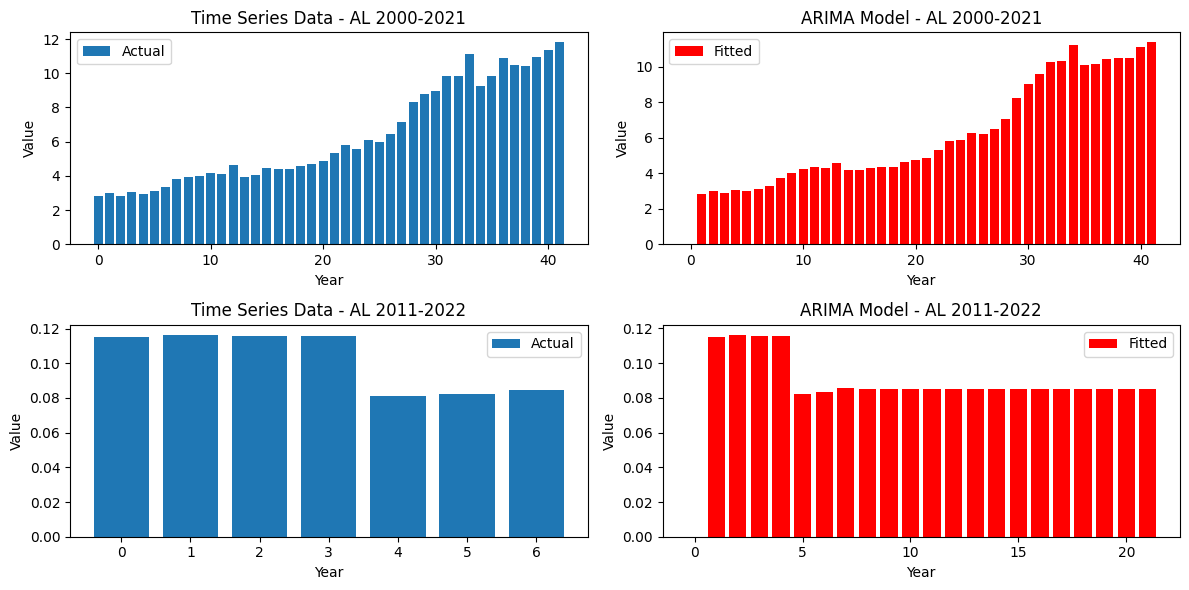

In [ ]:
country_code = 'AL'

time_series_data1 = data_2000_2021[data_2000_2021['unit,geo\\time'].str.endswith(country_code)].iloc[:, 1:-1].values.flatten()
time_series_data1 = pd.to_numeric(time_series_data1, errors='coerce')

model1 = ARIMA(time_series_data1, order=(5, 1, 0))
result1 = model1.fit()

time_series_data2 = data_2011_2022[data_2011_2022['product,currency,unit,indic_en,geo\\time'].str.endswith(country_code)].iloc[:, 1:-1].values.flatten()
time_series_data2 = pd.to_numeric(time_series_data2, errors='coerce')

model2 = ARIMA(time_series_data2, order=(5, 1, 0))
result2 = model2.fit()

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(range(len(time_series_data1)), time_series_data1, label='Actual')
plt.title(f'Time Series Data - {country_code} 2000-2021')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.bar(range(len(result1.fittedvalues)), result1.fittedvalues, color='red', label='Fitted')
plt.title(f'ARIMA Model - {country_code} 2000-2021')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(range(len(time_series_data2)), time_series_data2, label='Actual')
plt.title(f'Time Series Data - {country_code} 2011-2022')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 4)
plt.bar(range(len(result2.fittedvalues)), result2.fittedvalues, color='red', label='Fitted')
plt.title(f'ARIMA Model - {country_code} 2011-2022')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

#Model Of LSTM

In [ ]:
column_name = 'unit,geo\\time'

if column_name in data_2000_2021.columns:
    data_2000_2021.set_index(column_name, inplace=True)
else:

    print(f"Column '{column_name}' not found in DataFrame. Please update the column name.")

data_2000_2021.replace(':', np.nan, inplace=True)
data_2000_2021 = data_2000_2021.apply(pd.to_numeric, errors='coerce')

data_2000_2021.fillna(data_2000_2021.mean(), inplace=True)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_2000_2021)

sequence_length = 10

X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:(i + sequence_length)])
    y.append(data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=X.shape[2]))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions.reshape(-1, X.shape[2]))

y_test = y_test.flatten()
predictions = predictions.flatten()


Epoch 1/50
2/2 [==============================] - 2s 308ms/step - loss: 0.1879 - val_loss: 0.1886
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 0.1696 - val_loss: 0.1704
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1539 - val_loss: 0.1528
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1376 - val_loss: 0.1357
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.1230 - val_loss: 0.1197
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1110 - val_loss: 0.1057
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0987 - val_loss: 0.0940
Epoch 8/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0906 - val_loss: 0.0849
Epoch 9/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0835 - val_loss: 0.0782
Epoch 10/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0785 - val_loss: 0.0728
Epoch 11/50
2/2 [===========

#LSTM Table of Actual and Predicted Values

In [ ]:
result_summary = pd.DataFrame({
    'Actual': scaler.inverse_transform(y_test.reshape(-1, X.shape[2])).flatten(),
    'Predicted': predictions.reshape(-1, X.shape[2]).flatten()
})
print('\nLSTM Table of Actual and Predicted Values:')
print(result_summary.head())


LSTM Table of Actual and Predicted Values:
   Actual  Predicted
0   4.054   5.229439
1   3.731   5.131279
2   4.038   5.499422
3   3.740   5.288470
4   3.673   5.234245


#LSTM using Actual vs Predicted Values

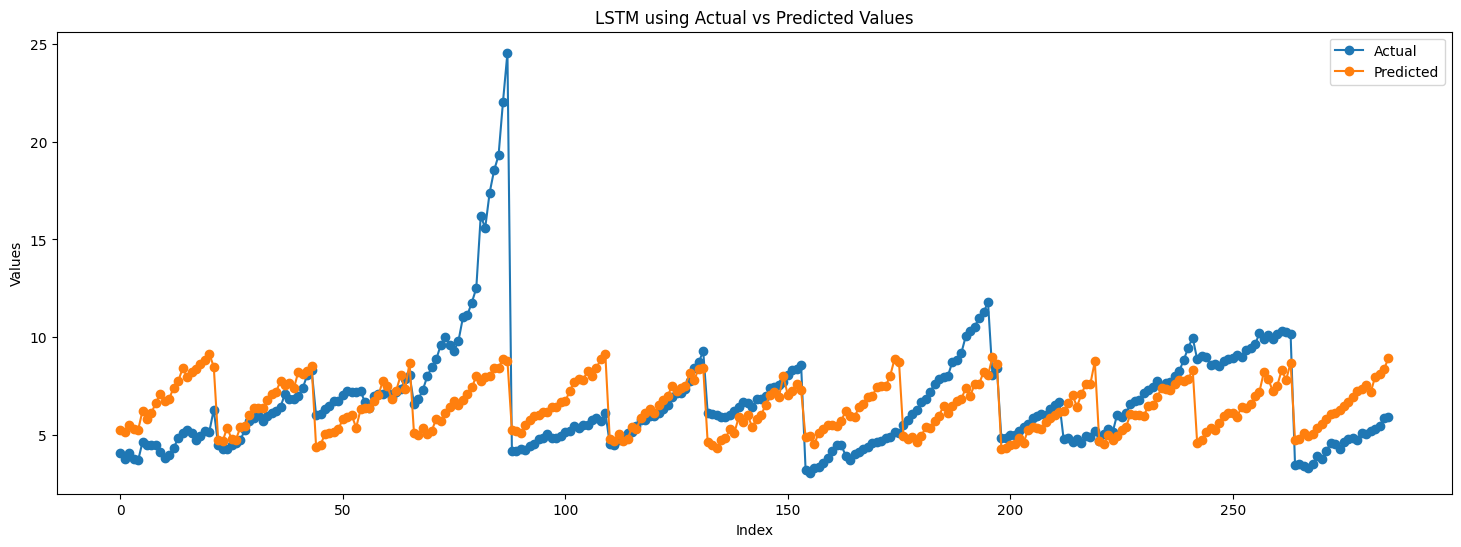

In [ ]:
plt.figure(figsize=(18, 6))

plt.plot(result_summary.index, result_summary['Actual'], label='Actual', marker='o')
plt.plot(result_summary.index, result_summary['Predicted'], label='Predicted', marker='o')

plt.title('LSTM using Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

#Model Of Random Forest Regressor

In [ ]:
data_2000_2021.replace(':', np.nan, inplace=True)
data_2000_2021.iloc[:, 1:] = data_2000_2021.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='mean')
data_2000_2021.iloc[:, 1:] = imputer.fit_transform(data_2000_2021.iloc[:, 1:])

numeric_columns = data_2000_2021.columns[1:]

if numeric_columns.any():
    y = data_2000_2021[numeric_columns[0]]
else:
    raise KeyError("No numeric columns found in the dataset.")

X = data_2000_2021.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 0.05182063303333346
R-squared Score: 0.9785163362541841


#Random Forest Regressor Table of Actual and Predicted Values

In [ ]:
result_table = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print('\nRandom Forest Regressor Table of Actual and Predicted Values:')
print(result_table)


Random Forest Regressor Table of Actual and Predicted Values:
                    Actual  Predicted
unit,geo\time                        
EUR_KGOE,BG          1.299    1.73533
PPS_KGOE,MT          3.731    3.58132
EUR_KGOE,EL          6.076    6.35282
EUR_KGOE,AL          3.003    2.84966
EUR_KGOE,TR          5.212    4.99440
PPS_KGOE,ME          4.845    4.79245
EUR_KGOE,PL          2.770    2.71088
EUR_KGOE,EU27_2020   6.226    5.90478
PPS_KGOE,RS          2.722    2.89257
PPS_KGOE,NL          4.660    4.42200
EUR_KGOE,SK          2.345    2.46675
PPS_KGOE,BG          2.360    2.56293
PPS_KGOE,ES          5.791    5.84031
EUR_KGOE,IS          2.544    2.14115
EUR_KGOE,EE          2.207    2.24060


#Random Forest Regressor using Actual vs Predicted Values

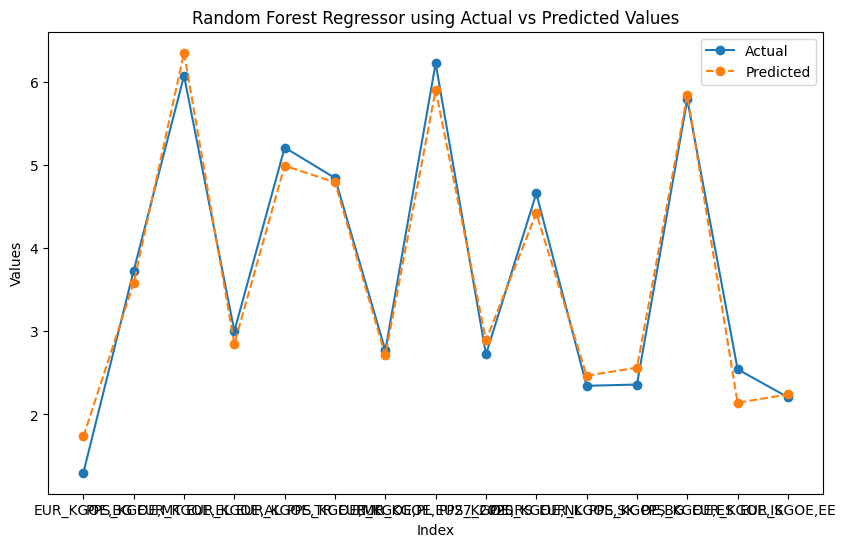

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(y_test.index, y_test.values, label='Actual', marker='o', linestyle='-')
plt.plot(y_test.index, y_pred, label='Predicted', marker='o', linestyle='--')

plt.title('Random Forest Regressor using Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

#Model Of Linear Regression

In [ ]:
data_2000_2021.replace(':', np.nan, inplace=True)
data_2000_2021.iloc[:, 1:] = data_2000_2021.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='mean')
data_2000_2021.iloc[:, 1:] = imputer.fit_transform(data_2000_2021.iloc[:, 1:])

numeric_columns = data_2000_2021.columns[1:]

if numeric_columns.any():
    y = data_2000_2021[numeric_columns[0]]
else:
    raise KeyError("No numeric columns found in the dataset.")

X = data_2000_2021.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 0.013893889843664636
R-squared Score: 0.9942399071556942


#Linear Regression Table of Actual and Predicted Values

In [ ]:
result_table = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print('\nLinear Regression Table of Actual and Predicted Values:')
print(result_table)


Linear Regression Table of Actual and Predicted Values:
                    Actual  Predicted
unit,geo\time                        
EUR_KGOE,BG          1.299   1.419484
PPS_KGOE,MT          3.731   3.823090
EUR_KGOE,EL          6.076   6.293731
EUR_KGOE,AL          3.003   2.987976
EUR_KGOE,TR          5.212   5.122347
PPS_KGOE,ME          4.845   4.790608
EUR_KGOE,PL          2.770   2.741634
EUR_KGOE,EU27_2020   6.226   6.194039
PPS_KGOE,RS          2.722   2.834511
PPS_KGOE,NL          4.660   4.556289
EUR_KGOE,SK          2.345   2.361996
PPS_KGOE,BG          2.360   2.609766
PPS_KGOE,ES          5.791   5.985137
EUR_KGOE,IS          2.544   2.518181
EUR_KGOE,EE          2.207   2.229670


#Linear Regression using Actual vs Predicted Values

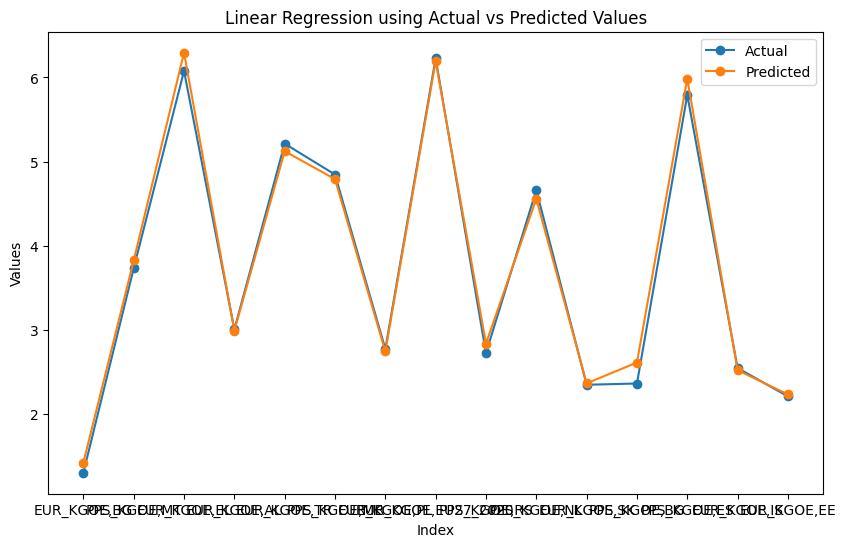

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', marker='o')

plt.title('Linear Regression using Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

#Comporison between  Random Forest Regressor and Linear Regression

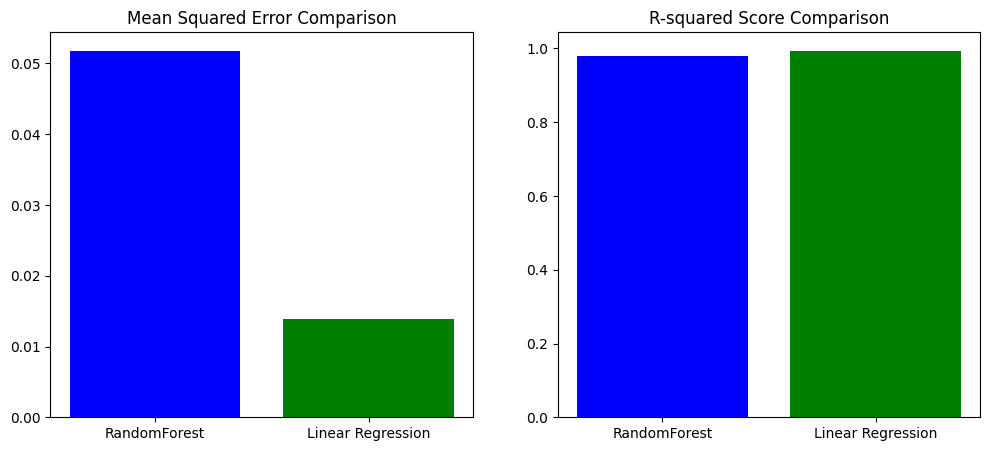

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

labels = ['RandomForest', 'Linear Regression']
mse_values = [mse_rf, mse_linear]
r2_values = [r2_rf, r2_linear]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(labels, mse_values, color=['blue', 'green'])
ax1.set_title('Mean Squared Error Comparison')

ax2.bar(labels, r2_values, color=['blue', 'green'])
ax2.set_title('R-squared Score Comparison')

plt.show()
